# Modeling with Naive Bayes

#### We build multiple Naive Bayes Models to Train on cleaned text and variables: 
#### Relevancy_score (highly relevant (4), very relevant (3), relevant (2), minimally relevant (1), not relevant (0))
#### Treatment_Number (user receives treatment (1), user does not receive treatment (0))
#### Recommendation_Score (user recommends treatment (1), user does not recommend treatment (0))

In [17]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from seaborn import set_style
set_style("whitegrid")
import seaborn as sns

In [18]:
data_df = pd.read_csv("enumerated_scraped_comments.csv")

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,  classification_report
from sklearn.model_selection import train_test_split
from collections import defaultdict
from imblearn.over_sampling import SMOTE

In [20]:
#vectorize text and create a train test split 
vectorizer1 = CountVectorizer()
vectors = vectorizer1.fit_transform(data_df.Comment)
feature_names = vectorizer1.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y1 = data_df.Relevancy_Score
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=100, test_size=0.2, stratify=y1)
X_train_vect = vectorizer1.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y1_train_res = sm.fit_resample(X_train_vect, y1_train)

In [21]:
#Create Instance of Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_res, y1_train_res)

MultinomialNB()

In [22]:
# Make predictions
X_test_vect = vectorizer1.transform(X_test)
y1_pred = nb.predict(X_test_vect)

In [23]:
# Evaluate the model
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))

Accuracy: 0.5016835016835017

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.47      0.60       157
           1       0.41      0.56      0.47        77
           2       0.37      0.63      0.47        49
           3       0.07      0.08      0.07        13
           4       0.00      0.00      0.00         1

    accuracy                           0.50       297
   macro avg       0.33      0.35      0.32       297
weighted avg       0.60      0.50      0.52       297



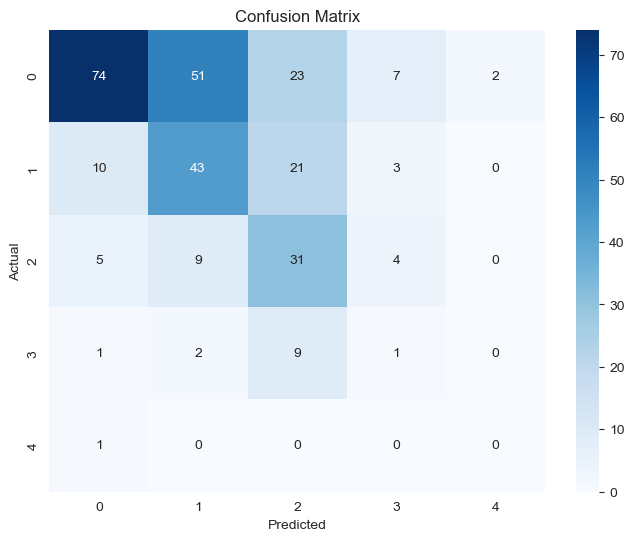

In [24]:
#Produce the confusion matrix 
cm = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
#vectorize text and create a train test split 
vectorizer1 = CountVectorizer()
vectors = vectorizer1.fit_transform(data_df.Comment)
feature_names = vectorizer1.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y2 = data_df.Treatment_Number
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, random_state=200, test_size=0.2,stratify=y2)
X_train_vect = vectorizer1.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y2_train_res = sm.fit_resample(X_train_vect, y2_train)

In [26]:
#Create Instance of Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_res, y2_train_res)

MultinomialNB()

In [27]:
# Make predictions
X_test_vect = vectorizer1.transform(X_test)
y2_pred = nb.predict(X_test_vect)

In [28]:
# Evaluate the model
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("\nClassification Report:\n", classification_report(y2_test, y2_pred))

Accuracy: 0.696969696969697

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.66      0.76       219
           1       0.46      0.79      0.58        78

    accuracy                           0.70       297
   macro avg       0.68      0.73      0.67       297
weighted avg       0.78      0.70      0.71       297



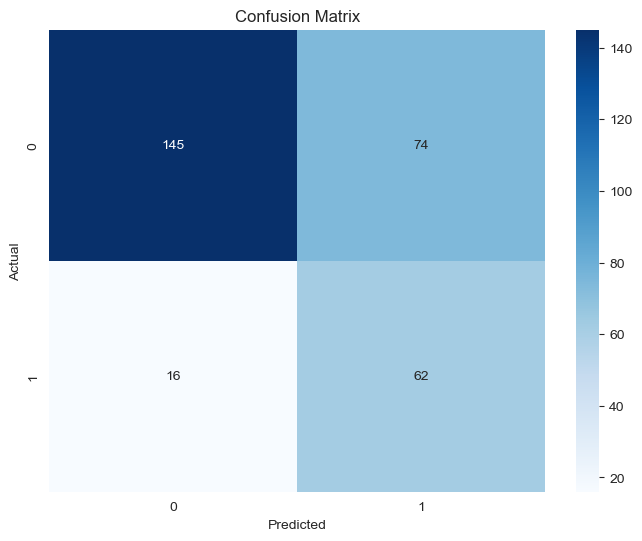

In [29]:
#Produce the confusion matrix 
cm = confusion_matrix(y2_test, y2_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
#vectorize text and create a train test split 
vectorizer1 = CountVectorizer()
vectors = vectorizer1.fit_transform(data_df.Comment)
feature_names = vectorizer1.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y3 = data_df.Recommendation_Score
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, random_state=300, test_size=0.2,stratify=y3)
X_train_vect = vectorizer1.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y3_train_res = sm.fit_resample(X_train_vect, y3_train)

In [31]:
#Create Instance of Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_res, y3_train_res)

MultinomialNB()

In [32]:
# Make predictions
X_test_vect = vectorizer1.transform(X_test)
y3_pred = nb.predict(X_test_vect)

In [33]:
# Evaluate the model
print("Accuracy:", accuracy_score(y3_test, y3_pred))
print("\nClassification Report:\n", classification_report(y3_test, y3_pred))

Accuracy: 0.7643097643097643

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       264
           1       0.15      0.24      0.19        33

    accuracy                           0.76       297
   macro avg       0.52      0.54      0.52       297
weighted avg       0.81      0.76      0.79       297



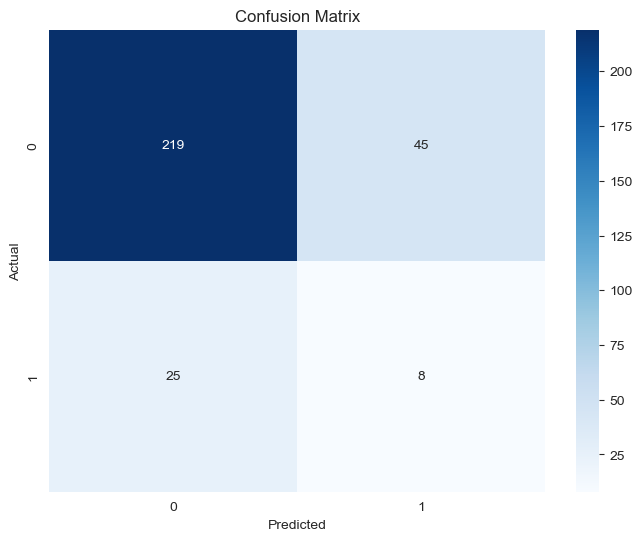

In [34]:
#Produce the confusion matrix 
cm = confusion_matrix(y3_test, y3_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
#vectorize text and create a train test split 
vectorizer2 = TfidfVectorizer()
vectors = vectorizer2.fit_transform(data_df.Comment)
feature_names = vectorizer2.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y1 = data_df.Relevancy_Score
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=400, test_size=0.2,stratify=y1)
X_train_vect = vectorizer2.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y1_train_res = sm.fit_resample(X_train_vect, y1_train)

In [36]:
#Create Instance of Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_res, y1_train_res)

MultinomialNB()

In [37]:
# Make predictions
X_test_vect = vectorizer2.transform(X_test)
y1_pred = nb.predict(X_test_vect)

In [38]:
# Evaluate the model
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))

Accuracy: 0.1919191919191919

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.06      0.11       157
           1       0.22      0.18      0.20        77
           2       0.30      0.51      0.38        49
           3       0.07      0.69      0.13        13
           4       0.00      0.00      0.00         1

    accuracy                           0.19       297
   macro avg       0.32      0.29      0.16       297
weighted avg       0.64      0.19      0.18       297



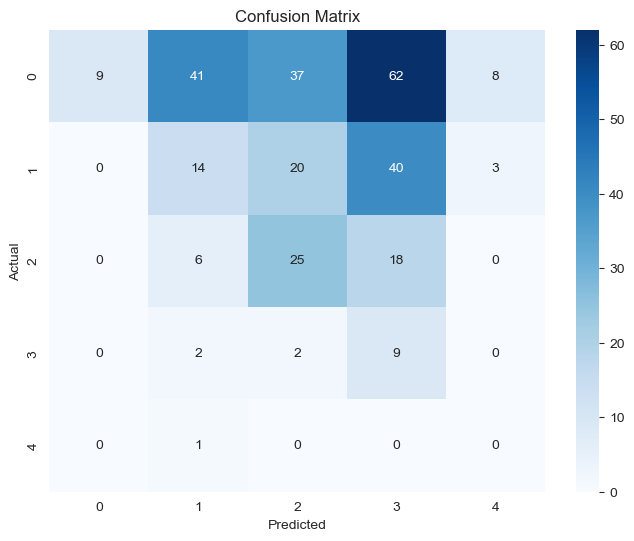

In [39]:
#Produce the confusion matrix 
cm = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
#vectorize text and create a train test split 
vectorizer2 = TfidfVectorizer()
vectors = vectorizer2.fit_transform(data_df.Comment)
feature_names = vectorizer2.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y2 = data_df.Treatment_Number
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, random_state=500, test_size=0.2,stratify=y2)
X_train_vect = vectorizer2.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y2_train_res = sm.fit_resample(X_train_vect, y2_train)

In [41]:
#Create Instance of Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_res, y2_train_res)

MultinomialNB()

In [42]:
# Make predictions
X_test_vect = vectorizer2.transform(X_test)
y2_pred = nb.predict(X_test_vect)

In [43]:
# Evaluate the model
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("\nClassification Report:\n", classification_report(y2_test, y2_pred))

Accuracy: 0.47474747474747475

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.29      0.45       219
           1       0.33      0.99      0.50        78

    accuracy                           0.47       297
   macro avg       0.66      0.64      0.47       297
weighted avg       0.81      0.47      0.46       297



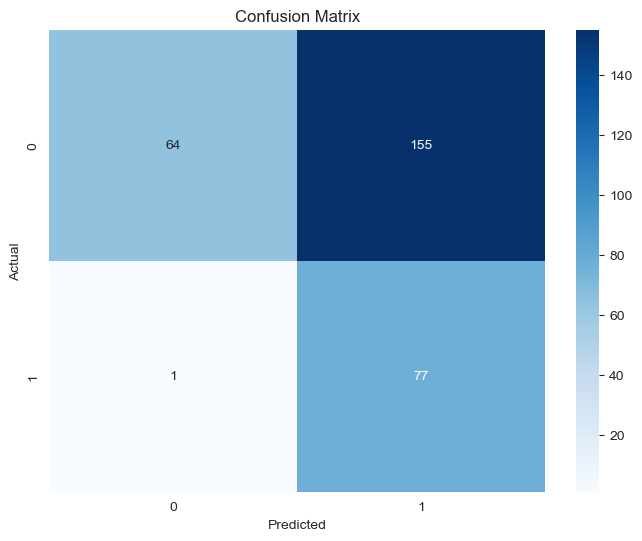

In [44]:
#Produce the confusion matrix 
cm = confusion_matrix(y2_test, y2_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [45]:
#vectorize text and create a train test split 
vectorizer2 = TfidfVectorizer()
vectors = vectorizer2.fit_transform(data_df.Comment)
feature_names = vectorizer2.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y3 = data_df.Recommendation_Score
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, random_state=600, test_size=0.2,stratify=y3)
X_train_vect = vectorizer2.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y3_train_res = sm.fit_resample(X_train_vect, y3_train)

In [46]:
#Create Instance of Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_res, y3_train_res)

MultinomialNB()

In [47]:
# Make predictions
X_test_vect = vectorizer2.transform(X_test)
y3_pred = nb.predict(X_test_vect)

In [48]:
# Evaluate the model
print("Accuracy:", accuracy_score(y3_test, y3_pred))
print("\nClassification Report:\n", classification_report(y3_test, y3_pred))

Accuracy: 0.31313131313131315

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.23      0.37       264
           1       0.14      1.00      0.24        33

    accuracy                           0.31       297
   macro avg       0.57      0.61      0.31       297
weighted avg       0.90      0.31      0.36       297



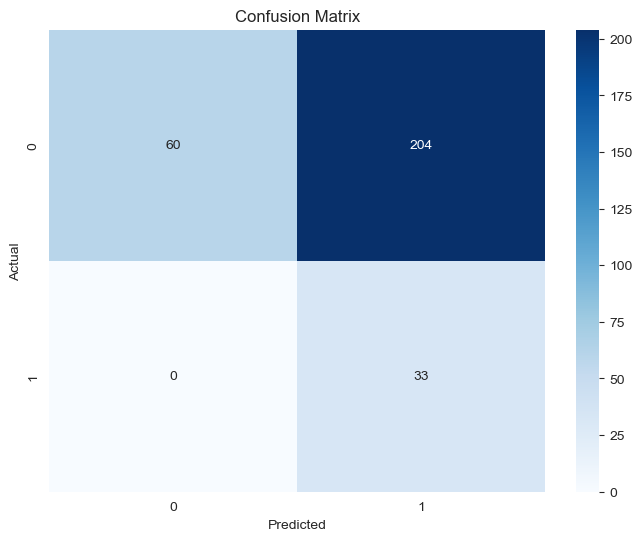

In [49]:
#Produce the confusion matrix 
cm = confusion_matrix(y3_test, y3_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()